Analisis cuantitativo de la perdida de vegetacion de la porcion de la ecoregion del Chaco Seco que ocupa la provincia de Cordoba para el periodo 2000-2024

- Informacion obtenida de: biomapas.com.ar

In [2]:
#Librerias utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
# Directorio de trabajo
os.chdir("D:/Josefina/Proyectos/bosques/data")
#print(os.getcwd())

D:\Josefina\Proyectos\bosques\data


In [31]:
df_vegetacion = pd.read_csv("D:/Josefina/Proyectos/bosques/data/perdida_vegetacion_CBA-ChacoS_V02.csv")
# print(df_vegetacion)
df_vegetacion.head()

# La serie temporal descargada esta desde 1985, pero nos interesa desde el 2000-2024
#
df_vegetacion = df_vegetacion[df_vegetacion['year'] >= 2000]
#Corroboramos
print(df_vegetacion['year'])

15    2000
16    2001
17    2002
18    2003
19    2004
20    2005
21    2006
22    2007
23    2008
24    2009
25    2010
26    2011
27    2012
28    2013
29    2014
30    2015
31    2016
32    2017
33    2018
34    2019
35    2020
36    2021
37    2022
38    2023
39    2024
Name: year, dtype: int64


In [23]:
#Vemos la generalidad del dataset
df_vegetacion.describe()
print(df_vegetacion.columns)


Index(['year', 'total_prim', 'ischilin_prim', 'tulumba_prim',
       'calamuchita_prim', 'rioSeco_prim', 'totoral_prim', 'sobremonte_prim',
       'punilla_prim', 'sanAlberto_prim', 'sanJavier_prim', 'minas_prim',
       'pocho_prim', 'cruzEje_prim', 'capital_prim', 'colon_prim',
       'rioCuarto_prim', 'rioPrimero_prim', 'SantaMaria_prim',
       'terceroArriba_prim'],
      dtype='object')


In [24]:
#Hay datos sin informacion?
df_vegetacion.isnull().sum()


year                  0
total_prim            0
ischilin_prim         0
tulumba_prim          0
calamuchita_prim      0
rioSeco_prim          0
totoral_prim          0
sobremonte_prim       0
punilla_prim          0
sanAlberto_prim       0
sanJavier_prim        0
minas_prim            0
pocho_prim            0
cruzEje_prim          0
capital_prim          3
colon_prim            0
rioCuarto_prim        0
rioPrimero_prim       0
SantaMaria_prim       0
terceroArriba_prim    4
dtype: int64

Vemos que los departo capital y tecero tienen años en donde no sean cuantificado perdidas de vegetacion. Pero los vamos a dejar en el analisis

In [25]:
# Cuales son los departamentos que mas hubo perdida de vegetacion?
dept_cols = [
    'ischilin_prim', 'tulumba_prim', 'calamuchita_prim', 'rioSeco_prim',
    'totoral_prim', 'sobremonte_prim', 'punilla_prim', 'sanAlberto_prim',
    'sanJavier_prim', 'minas_prim', 'pocho_prim', 'cruzEje_prim',
    'capital_prim', 'colon_prim', 'rioCuarto_prim', 'rioPrimero_prim',
    'SantaMaria_prim', 'terceroArriba_prim'
]

# 1. Departamento con mayor pérdida en todo el período(Ha)
max_value = df_vegetacion[dept_cols].max().max()
# 2. Valor máximo de ese departamento
max_dept = df_vegetacion[dept_cols].max().idxmax()
# 3. Año en que ocurrió
max_year = df_vegetacion.loc[df_vegetacion[max_dept].idxmax(), 'year']

print("Departamento:", max_dept)
print("Perdida maxima:", max_value)
print("Año:", max_year)

Departamento: ischilin_prim
Perdida maxima: 10671.0
Año: 2005


In [13]:
# 1. Departamento con menor pérdida en todo el período (Ha)
min_value = df_vegetacion[dept_cols].min().min()
# 2. Valor menor de ese departamento
min_dept = df_vegetacion[dept_cols].min().idxmin()
# 3. Año en que ocurrió
min_year = df_vegetacion.loc[df_vegetacion[min_dept].idxmin(), 'year']

print("Departamento:", min_dept)
print("Perdida maxima:", min_value)
print("Año:", min_year)

Departamento: capital_prim
Perdida maxima: 0.2
Año: 2017


## Plots

In [43]:
import pandas as pd

# Todas las columnas de departamentos (todas menos "year" y "total_prim")
dept_cols = [
    'ischilin_prim', 'tulumba_prim', 'calamuchita_prim', 'rioSeco_prim',
    'totoral_prim', 'sobremonte_prim', 'punilla_prim', 'sanAlberto_prim',
    'sanJavier_prim', 'minas_prim', 'pocho_prim', 'cruzEje_prim',
    'capital_prim', 'colon_prim', 'rioCuarto_prim', 'rioPrimero_prim',
    'SantaMaria_prim', 'terceroArriba_prim'
]



nombre_departamentos = {
    "ischilin_prim": "Ischilin",
    "tulumba_prim": "Tulumba",
    "calamuchita_prim": "Calamuchita",
    "rioSeco_prim": "Rio Seco",
    "totoral_prim": "Totoral",
    "sobremonte_prim": "Sobremonte",
    "punilla_prim": "Punilla",
    "sanAlberto_prim": "San Alberto",
    "sanJavier_prim": "San Javier",
    "pocho_prim": "Pocho",
    "minas_prim": "Minas",
    "cruzEje_prim": "Cruz del Eje",
    "capital_prim": "Capital",
    "colon_prim": "Colon",
    "rioCuarto_prim": "Rio Cuarto",
    "rioPrimero_prim": "Rio Primero",
    "SantaMaria_prim": "Santa Maria",
    "terceroArriba_prim": "Tercero Arriba"
}

paleta_departamentos = {
    "Ischilin": "#1b9e77",
    "Tulumba": "#d95f02",
    "Calamuchita": "#7570b3",
    "Rio Seco": "#e7298a",
    "Totoral": "#66a61e",
    "Sobremonte": "#e6ab02",
    "Punilla": "#a6761d",
    "San Alberto": "#666666",
    "San Javier": "#1f78b4",
    "Minas": "#b2df8a",
    "Pocho": "#fb9a99",
    "Cruz del Eje": "#fdbf6f",
    "Capital": "#cab2d6",
    "Colon": "#6a3d9a",
    "Rio Cuarto": "#ffff99",
    "Rio Primero": "#b15928",
    "Santa Maria": "#8dd3c7",
    "Tercero Arriba": "#bebada"
}


# 1) Convertir a formato largo
df_long = df_vegetacion.melt(
    id_vars="year",
    value_vars=dept_cols,
    var_name="region",
    value_name="valor"
)

# 2) Recodificar nombres (antes de crear top4)
df_long["region"] = df_long["region"].map(nombre_departamentos)

# 3) Seleccionar top4 valores globales
df_top4 = df_long.sort_values("valor", ascending=False).head(4).copy()

# 4) Crear etiquetas
df_top4["label"] = df_top4["region"] + "\n" + df_top4["year"].astype(str) + " – " + df_top4["valor"].astype(str) + " ha"


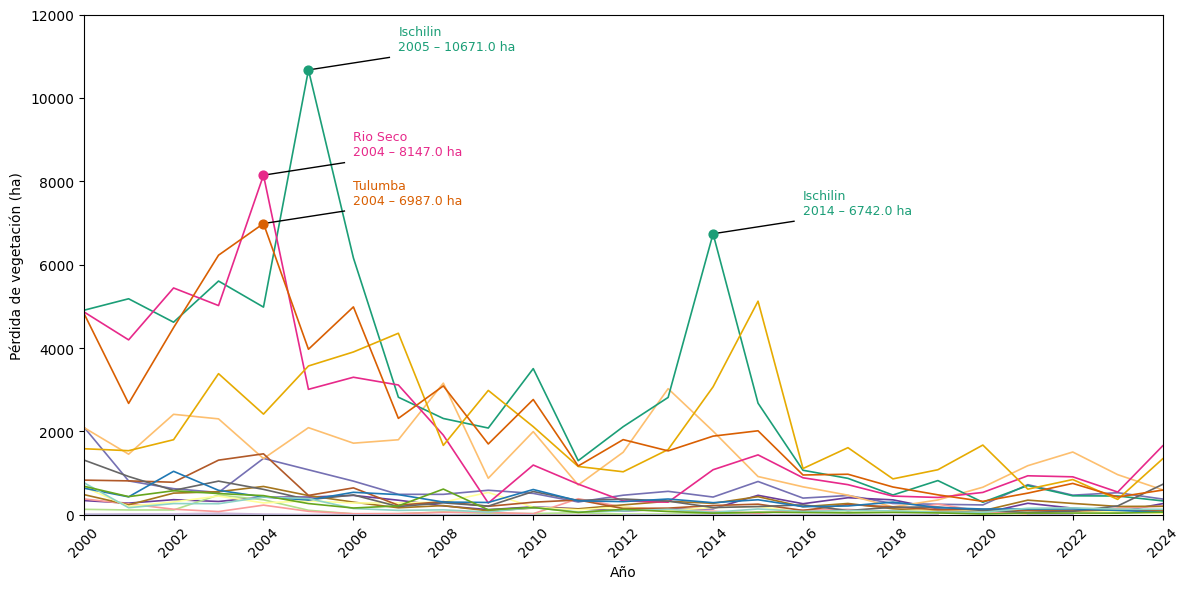

In [44]:
## Plot que muestra la serie temporal anual de cuantas hectareas se perdieron de vegetacion en cada uno de los dptos
# Se destacan los 4 Departamenteos/años que mas perdida han tenido en este periodo de datos
plt.figure(figsize=(12, 6))

# --- Líneas ---
for region, df_region in df_long.groupby("region"):
    plt.plot(
        df_region["year"],
        df_region["valor"],
        color=paleta_departamentos.get(region, "gray"),
        linewidth=1.2
    )

# --- Puntos top4 ---
for _, row in df_top4.iterrows():
    plt.scatter(
        row["year"],
        row["valor"],
        color=paleta_departamentos.get(row["region"], "black"),
        s=40,
        zorder=5
    )

# --- Segmentos ---
for x, row in df_top4.iterrows():
    plt.plot(
        [row["year"], row["year"] + 1.8],
        [row["valor"], row["valor"] + 300],
        color="black",
        linewidth=1
    )

# --- Etiquetas ---
for x, row in df_top4.iterrows():
    plt.text(
        row["year"] + 2,
        row["valor"] + 400,
        row["label"],
        color=paleta_departamentos.get(row["region"], "black"),
        fontsize=9,
        va="bottom"
    )

# --- Ejes ---
plt.xlim(2000, 2024)
plt.xticks(range(2000, 2025, 2), rotation=45)
plt.ylim(0, 12000)
plt.yticks(range(0, 12001, 2000))

plt.xlabel("Año")
plt.ylabel("Pérdida de vegetación (ha)")

plt.grid(False)
plt.tight_layout()
plt.show()


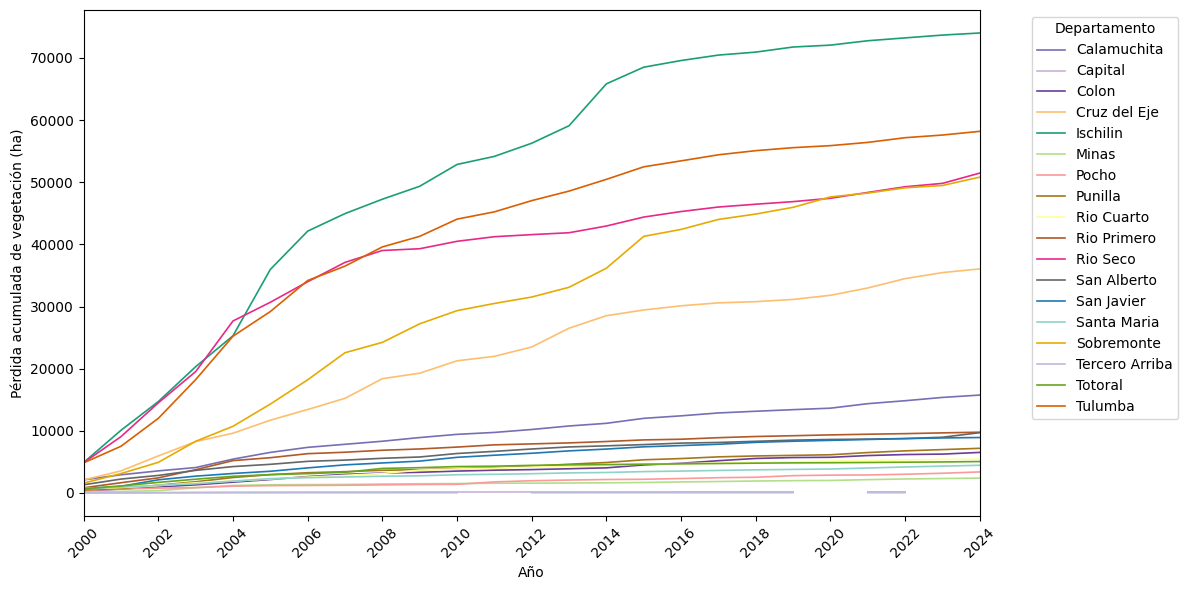

In [ ]:
#Serie temporal acumulado por dpártamenteo

# Asegurarse de tener df_long con nombres amigables
df_acum = df_long.copy()

# Ordenar por año y calcular la suma acumulada por región
df_acum = df_acum.sort_values(["region", "year"])
df_acum["valor_acum"] = df_acum.groupby("region")["valor"].cumsum()



plt.figure(figsize=(12, 6))

for region, df_region in df_acum.groupby("region"):
    plt.plot(
        df_region["year"],
        df_region["valor_acum"],
        color=paleta_departamentos.get(region, "gray"),
        linewidth=1.2,
        label=region  # opcional, si querés leyenda
    )

plt.xlim(2000, 2024)
plt.xticks(range(2000, 2025, 2), rotation=45)
plt.ylabel("Pérdida acumulada de vegetación (ha)")
plt.xlabel("Año")
plt.legend(title="Departamento", bbox_to_anchor=(1.05, 1), loc='upper left') ####

plt.grid(False)
plt.tight_layout()
plt.show()


# Se puede mejorar la leyenda

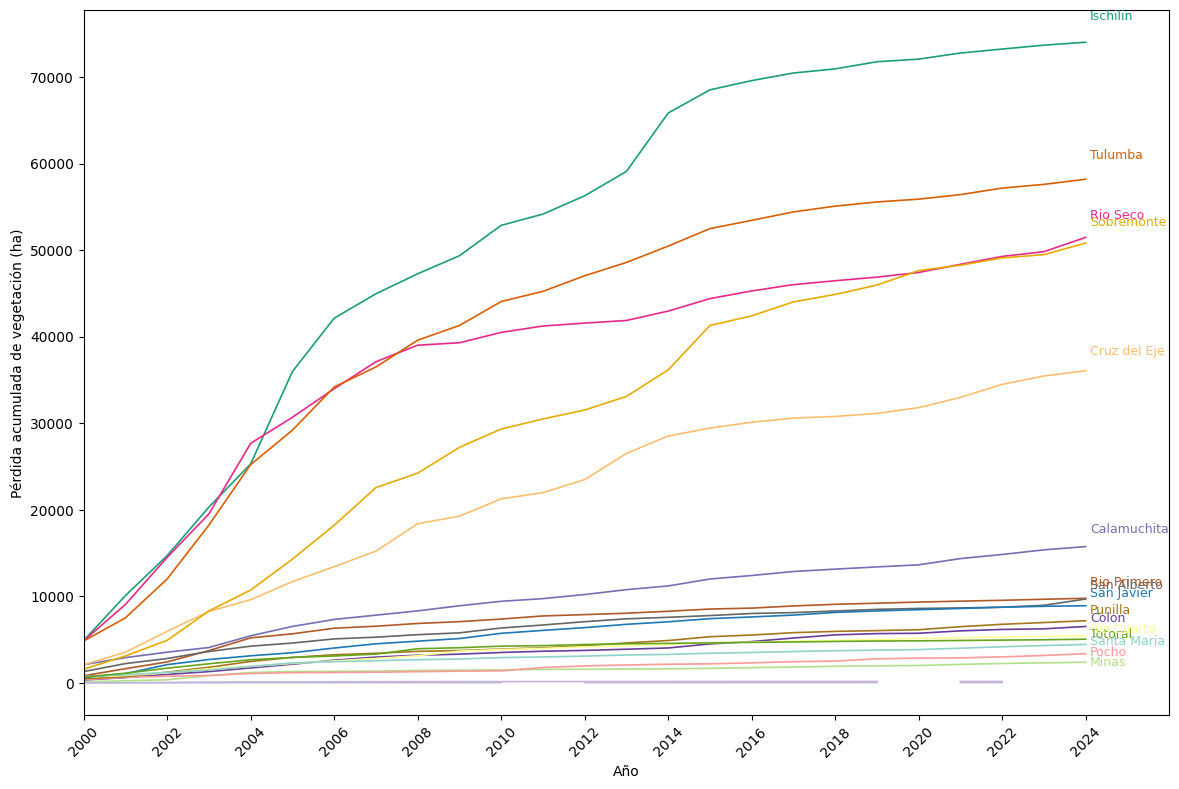

In [57]:
plt.figure(figsize=(12, 8))

for region, df_region in df_long.groupby("region"):
    plt.plot(
        df_region["year"],
        df_region["valor_acum"],
        color=paleta_departamentos.get(region, "gray"),
        linewidth=1.2
    )

# Etiquetas al final de cada línea (último año)
labels_final = labels_final.sort_values('valor_acum')  # ordenar para separar
for i, (_, row) in enumerate(labels_final.iterrows()):
    plt.text(
        row["year"] + 0.1,
        row["valor_acum"] + i*200,   # desplazar cada etiqueta un poco en Y
        row["region"],
        color=paleta_departamentos.get(row["region"], "gray"),
        fontsize=9,
        va="center"
    )


plt.xlim(2000, 2026)
plt.xticks(range(2000, 2025, 2), rotation=45)
plt.ylabel("Pérdida acumulada de vegetación (ha)")
plt.xlabel("Año")
plt.tight_layout()
plt.show()


## Analisis de hectareas de vegetacion perdida en comapracion con el area total del cada departamento

In [60]:
df_hectareas = pd.read_csv("hectareas_dptos_chacoSeco.csv")
df_hectareas = df_hectareas.dropna()  # elimina filas con NA
df_plot = df_hectareas.sort_values("porc_dpto_CS")
df_hectareas.head()


,TOPONIMIA,area_ha_total,area_ha_ecoregion,porc_dpto_CS,porc_dpto_Total_CS
0,Calamuchita,476616.9701,450887.166,0.946016,0.080145
1,Capital,57599.3636,2170.794,0.037688,0.000386
2,Colon,236821.9677,93587.162,0.395179,0.016635
3,Cruz del Eje,659614.6497,659614.439,1.000000,0.117246
4,Ischilin,504405.9088,482103.477,0.955785,0.085694


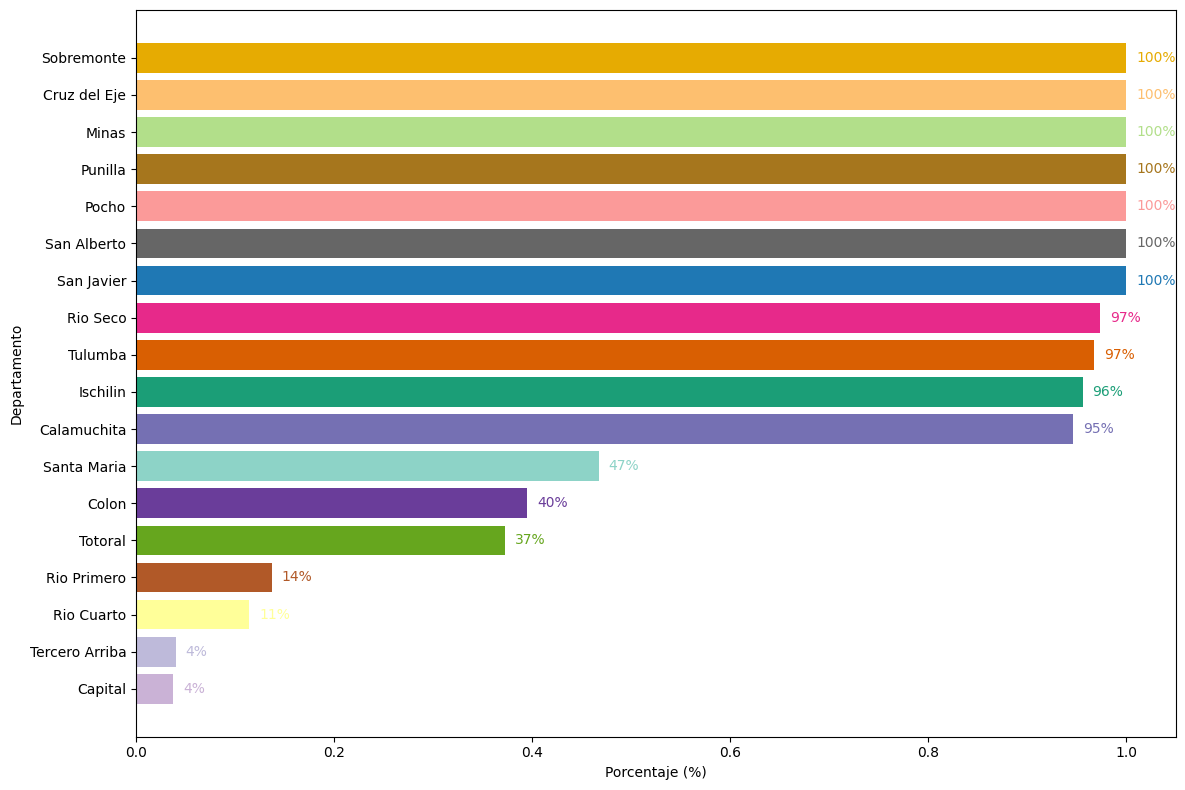

In [66]:
# Ordenar de mayor a menor
df_plot = df_hectareas.sort_values("porc_dpto_CS", ascending=False)


plt.figure(figsize=(12, 8))

# Crear barras
bars = plt.barh(
    df_plot["TOPONIMIA"],
    df_plot["porc_dpto_CS"],
    color=[paleta_departamentos.get(x, "gray") for x in df_plot["TOPONIMIA"]]
)

# Etiquetas de porcentaje al final de cada barra
for bar, pct, dep in zip(bars, df_plot["porc_dpto_CS"], df_plot["TOPONIMIA"]):
    plt.text(
        bar.get_width() + 0.01,          # un poco a la derecha
        bar.get_y() + bar.get_height()/2,
        f"{pct*100:.0f}%",               # porcentaje
        va='center',
        ha='left',
        color=paleta_departamentos.get(dep, "black"),
        fontsize=10
    )

plt.xlim(0, 1.05)  # escala 0–105%
plt.xlabel("Porcentaje (%)")
plt.ylabel("Departamento")
plt.gca().invert_yaxis()  # mismo efecto de coord_flip()
plt.grid(False)
plt.tight_layout()
plt.show()


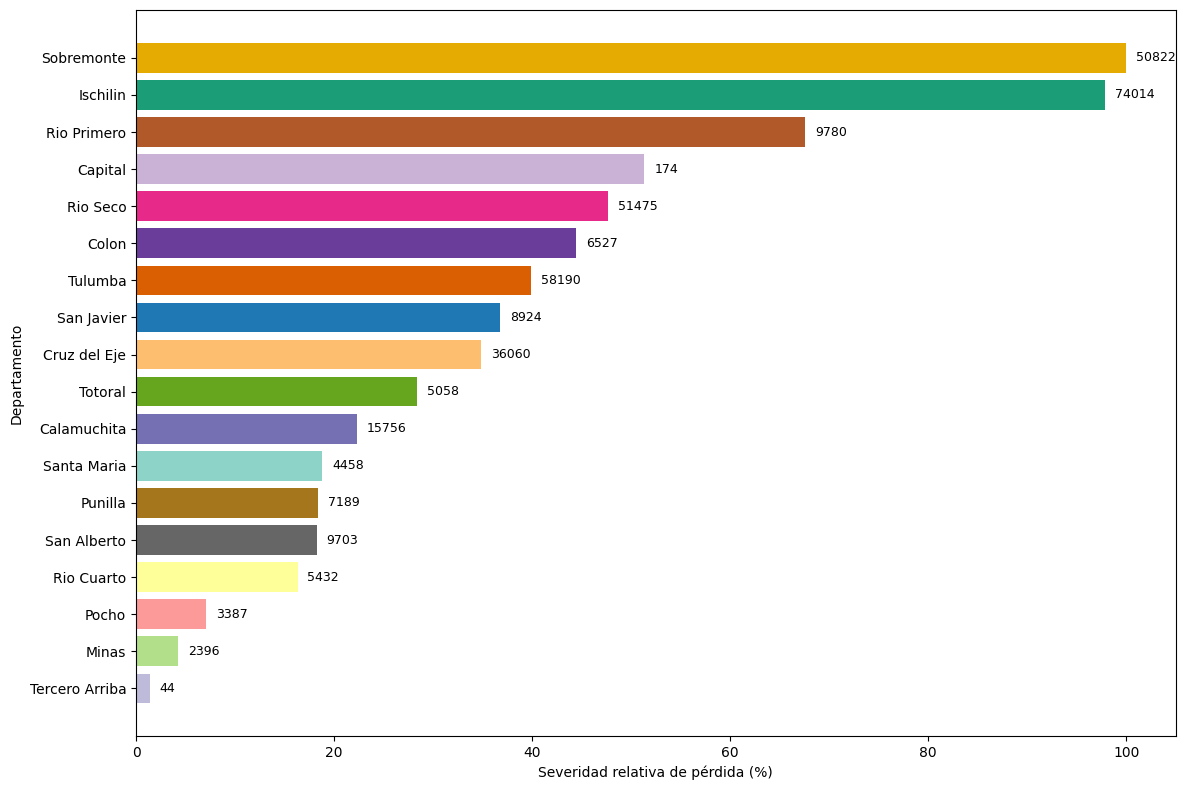

In [ ]:
#Severidad relativa de perdida en %

# ----------------------------
# df: pérdida por año
# df_hectareas: tamaño de departamento dentro del Chaco Seco
# ----------------------------


# Nombres originales y bonitos
originales = [
    "ischilin", "tulumba", "calamuchita", "rioSeco",
    "totoral", "sobremonte", "punilla", "sanAlberto",
    "sanJavier", "minas", "pocho", "cruzEje", "capital",
    "colon", "rioCuarto", "rioPrimero", "SantaMaria", "terceroArriba"
]

bonitos = [
    "Ischilin", "Tulumba", "Calamuchita", "Rio Seco",
    "Totoral", "Sobremonte", "Punilla", "San Alberto",
    "San Javier", "Minas", "Pocho", "Cruz del Eje", "Capital",
    "Colon", "Rio Cuarto", "Rio Primero", "Santa Maria", "Tercero Arriba"
]

nombres_map = dict(zip(originales, bonitos))

# Transformar a formato largo
df_long = df_vegetacion.melt(
    id_vars=['year', 'total_prim'],
    var_name='TOPONIMIA',
    value_name='perdida_ha'
)

# Limpiar sufijo "_prim" y renombrar
df_long['TOPONIMIA'] = df_long['TOPONIMIA'].str.replace("_prim", "")
df_long['TOPONIMIA'] = df_long['TOPONIMIA'].map(nombres_map)

# Calcular pérdida total por departamento
df_perdida_total = df_long.groupby('TOPONIMIA', as_index=False)['perdida_ha'].sum()
df_perdida_total.rename(columns={'perdida_ha':'perdida_total_ha'}, inplace=True)

# Merge con df_hectareas
df_merged = pd.merge(df_perdida_total, df_hectareas, on='TOPONIMIA', how='left')

# Índice de intensidad relativa
df_merged['indice_intensidad'] = df_merged['perdida_total_ha'] / df_merged['area_ha_ecoregion']

# Ranking
df_merged = df_merged.sort_values('indice_intensidad', ascending=False)

# Convertir a porcentaje relativo
df_merged['indice_percent'] = df_merged['indice_intensidad'] / df_merged['indice_intensidad'].max() * 100

# ----------------------------
# Colores personalizados (igual que tu paleta)
# ----------------------------
paleta_departamentos = {
    "Ischilin": "#1b9e77",
    "Tulumba": "#d95f02",
    "Calamuchita": "#7570b3",
    "Rio Seco": "#e7298a",
    "Totoral": "#66a61e",
    "Sobremonte": "#e6ab02",
    "Punilla": "#a6761d",
    "San Alberto": "#666666",
    "San Javier": "#1f78b4",
    "Minas": "#b2df8a",
    "Pocho": "#fb9a99",
    "Cruz del Eje": "#fdbf6f",
    "Capital": "#cab2d6",
    "Colon": "#6a3d9a",
    "Rio Cuarto": "#ffff99",
    "Rio Primero": "#b15928",
    "Santa Maria": "#8dd3c7",
    "Tercero Arriba": "#bebada"
}

# ----------------------------
# Gráfico barras horizontales
# ----------------------------
df_plot = df_merged.sort_values('indice_percent', ascending=True)  # para coord_flip

plt.figure(figsize=(12, 8))
bars = plt.barh(
    df_plot['TOPONIMIA'],
    df_plot['indice_percent'],
    color=[paleta_departamentos.get(x, 'gray') for x in df_plot['TOPONIMIA']]
)

# Etiquetas al costado con pérdida total
for bar, valor in zip(bars, df_plot['perdida_total_ha']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{int(valor)}', va='center', fontsize=9)

plt.xlabel('Severidad relativa de pérdida (%)')
plt.ylabel('Departamento')
plt.xlim(0, df_plot['indice_percent'].max()*1.05)  # un 5% extra para espacio texto
plt.tight_layout()
plt.show()


In [69]:
print("lalallala")

lalallala
